In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Sales_add.csv')
data

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


1.To check whether there is any increase in sales after stepping into digital maketing.

In [25]:
data.isna().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

In [3]:
data.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


(array([0., 1., 2., 3., 4., 5., 6.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

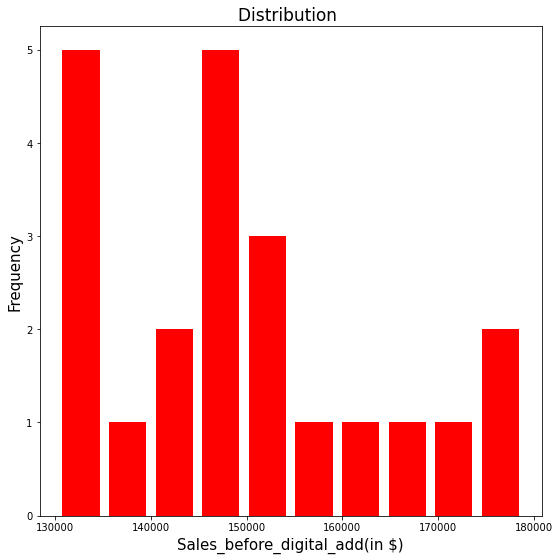

In [5]:
plt.figure(figsize=(9,9))
plt.hist(data['Sales_before_digital_add(in $)'],color='red',rwidth=0.8)
plt.title('Distribution ',fontsize=17)
plt.xlabel('Sales_before_digital_add(in $)',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks()
plt.yticks()

(array([0., 1., 2., 3., 4., 5., 6.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

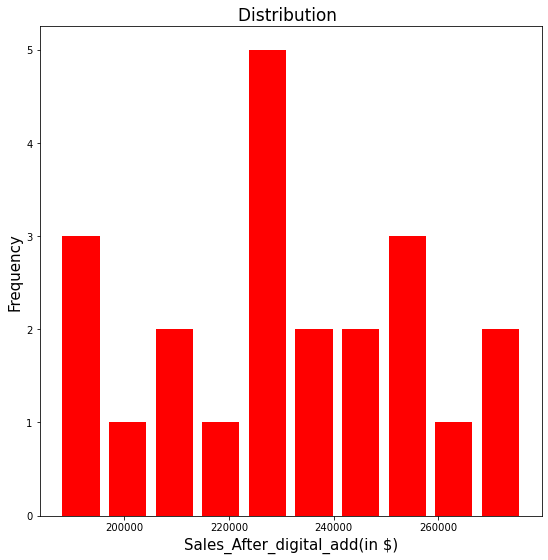

In [6]:
plt.figure(figsize=(9,9))
plt.hist(data['Sales_After_digital_add(in $)'],color='red',rwidth=0.8)
plt.title('Distribution ',fontsize=17)
plt.xlabel('Sales_After_digital_add(in $)',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks()
plt.yticks()

The Histogram of Sales_before_digital_add(in $) is multimodal and	Sales_After_digital_add(in $) is Unimodal.

H0:There is no increase in sales after entering into Digital marketing
H1:There is increase in sales after entering into Digital marketing

In [9]:
from scipy import stats

In [10]:
stats.ttest_rel(data['Sales_before_digital_add(in $)'],data['Sales_After_digital_add(in $)'])

Ttest_relResult(statistic=-12.09070525287017, pvalue=6.336667004575778e-11)

Since P value greater than significance level 0.05 we fail to reject the null hypothesis that ther is an increase in sales after entering into digital marketing.

2.To check whether there is any dependency between the features “Region” and “Manager”.

H0:There is no relation between Region and Manager
H1:There is a relation between Region and Manager

In [18]:
x=data['Region']
y=data['Manager']

In [27]:
contingency=pd.crosstab(x,y)
contingency

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [23]:
from scipy.stats import chi2_contingency

In [28]:
chi2, p, dof, expected=chi2_contingency(contingency)

In [29]:
print('The computed chi-square statistics is ',chi2)
print('The computed chi-square p-value is',p)
print('The expected cell counts are',expected)
print('The degrees of freedom are',dof)

The computed chi-square statistics is  3.050566893424036
The computed chi-square p-value is 0.5493991051158094
The expected cell counts are [[4.09090909 3.18181818 2.72727273]
 [2.86363636 2.22727273 1.90909091]
 [2.04545455 1.59090909 1.36363636]]
The degrees of freedom are 4


In [ ]:
1.Since P-value is greater than the significance level 0.05 we fail to reject the null hypothesis  
  It means there is no dependency between Region and Manager.